# import libary

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import pickle
import math

# Pre-Processing Data

In [3]:
df1 = pd.read_csv('/kaggle/input/datasetv6/PORT6001.csv', header=None)
df3 = pd.read_csv('/kaggle/input/datasetv6/PORT6003.csv', header=None)
df1.columns = ['time', 'date', 
              'Water Loss Ratio1','soil moisture1','water Level Ratio1',
              'Water Loss Ratio2','soil moisture2','water Level Ratio2',
              'Water Loss Ratio3','soil moisture3','water Level Ratio3',
             'temperature1','humidity1','Lighting1',
             'temperature2','humidity2','Lighting2',
             'temperature3','humidity3','Lighting3']
df3.columns = ['time', 'date', 
              'Water Loss Ratio1','soil moisture1','water Level Ratio1',
              'Water Loss Ratio2','soil moisture2','water Level Ratio2',
              'Water Loss Ratio3','soil moisture3','water Level Ratio3',
             'temperature1','humidity1','Lighting1',
             'temperature2','humidity2','Lighting2',
             'temperature3','humidity3','Lighting3']
df1.to_csv('file_with_headers1.csv', index=False, header=True)
df3.to_csv('file_with_headers3.csv', index=False, header=True)

In [4]:
label1 = 'Strawberry'
df1['type'] = label1
label3 = 'Pepper'
df3['type'] = label3

In [5]:
df1.to_csv('Strawberry.csv', index=False)
df3.to_csv('Pepper.csv', index=False)

In [6]:
Strawberry = pd.read_csv('/kaggle/working/Strawberry.csv')
Pepper = pd.read_csv('/kaggle/working/Pepper.csv')
merged_df = pd.concat([Strawberry, Pepper])

merged_df.to_csv('merged-data.csv', index=False)

In [7]:
data=pd.read_csv("/kaggle/working/merged-data.csv")


In [8]:
data['Water Loss Ratio in cm'] = data['Water Loss Ratio3']
data['soil moisture'] = data['soil moisture3']
data['Water Level Ratio'] = data['water Level Ratio3']
data['Temperature'] = data['temperature3']
data['Humidity'] = data['humidity3']
data['Luminosity'] = data['Lighting3']


data = data.drop(columns=['Water Loss Ratio1', 'Water Loss Ratio2','Water Loss Ratio3',
                      'soil moisture1', 'soil moisture2','soil moisture3',
                      'water Level Ratio1', 'water Level Ratio2','water Level Ratio3',
                      'temperature1', 'temperature2','temperature3',
                      'humidity1', 'humidity2','humidity3',
                      'Lighting1', 'Lighting2','Lighting3'
                      
                     ])

# write the modified dataframe to a new CSV file
data.to_csv('dataset.csv', index=False)

In [9]:
data=pd.read_csv("/kaggle/working/dataset.csv")
data.tail(10)

,time,date,type,Water Loss Ratio in cm,soil moisture,Water Level Ratio,Temperature,Humidity,Luminosity
6061,17:34,Apr 6 2023,Pepper,7,561,2.5,27.4,61.5,15986
6062,17:35,Apr 6 2023,Pepper,5,568,2.5,29.0,57.5,17935
6063,17:35,Apr 6 2023,Pepper,6,570,2.5,29.2,54.7,15466
6064,17:36,Apr 6 2023,Pepper,5,572,2.5,29.7,50.5,14111
6065,17:36,Apr 6 2023,Pepper,14,570,2.5,30.4,49.0,12429
6066,17:37,Apr 6 2023,Pepper,15,554,2.5,31.9,47.4,10707
6067,17:37,Apr 6 2023,Pepper,15,546,2.5,31.9,39.6,9283
6068,17:37,Apr 6 2023,Pepper,15,549,2.5,31.8,40.0,9209
6069,17:38,Apr 6 2023,Pepper,15,552,2.5,32.6,39.4,9223
6070,17:38,Apr 6 2023,Pepper,6,553,2.5,33.4,40.4,10334


In [10]:
data = data.drop(columns=['time', 'date'])

In [11]:
data['Water Loss Ratio in cm'] = math.pi *4  ** 2 * data['Water Loss Ratio in cm']
data['Water Loss Ratio in liters'] = data['Water Loss Ratio in cm'] /1000 
data=data.drop(columns=['Water Loss Ratio in cm'])

In [12]:
data['actual water Ratio in liters']=data['Water Level Ratio']-data['Water Loss Ratio in liters']

In [13]:
data

,type,soil moisture,Water Level Ratio,Temperature,Humidity,Luminosity,Water Loss Ratio in liters,actual water Ratio in liters
0,Strawberry,97,3.5,34.0,34.3,0,0.100531,3.399469
1,Strawberry,99,3.5,34.0,35.5,5882,0.100531,3.399469
2,Strawberry,114,3.5,34.0,35.8,1362,0.000000,3.500000
3,Strawberry,123,3.5,33.9,35.1,10658,0.000000,3.500000
4,Strawberry,128,3.5,32.8,35.5,10870,0.000000,3.500000
...,...,...,...,...,...,...,...,...
6066,Pepper,554,2.5,31.9,47.4,10707,0.753982,1.746018
6067,Pepper,546,2.5,31.9,39.6,9283,0.753982,1.746018
6068,Pepper,549,2.5,31.8,40.0,9209,0.753982,1.746018
6069,Pepper,552,2.5,32.6,39.4,9223,0.753982,1.746018


In [14]:
len(data['type'].unique())

2

In [15]:
one_hot = pd.get_dummies(data['type'])
data = data.drop('type',axis = 1)
data = data.join(one_hot)

In [16]:
data.tail()

,soil moisture,Water Level Ratio,Temperature,Humidity,Luminosity,Water Loss Ratio in liters,actual water Ratio in liters,Pepper,Strawberry
6066,554,2.5,31.9,47.4,10707,0.753982,1.746018,1,0
6067,546,2.5,31.9,39.6,9283,0.753982,1.746018,1,0
6068,549,2.5,31.8,40.0,9209,0.753982,1.746018,1,0
6069,552,2.5,32.6,39.4,9223,0.753982,1.746018,1,0
6070,553,2.5,33.4,40.4,10334,0.301593,2.198407,1,0


In [17]:
data.to_csv('fulldata.csv')

# describe Data

In [18]:
data=pd.read_csv('fulldata.csv')

In [23]:
data=data.drop("Unnamed: 0",axis=1)

In [24]:
data.describe()

,soil moisture,Water Level Ratio,Temperature,Humidity,Luminosity,Water Loss Ratio in liters,actual water Ratio in liters,Pepper,Strawberry
count,6071.000000,6071.000000,6071.000000,6071.000000,6071.000000,6071.000000,6071.000000,6071.000000,6071.000000
mean,157.815022,3.000247,25.881387,53.977813,6291.652281,0.509543,2.490704,0.499753,0.500247
std,151.569139,0.500041,5.323865,12.986651,7487.073287,0.321711,0.591327,0.500041,0.500041
min,7.000000,2.500000,13.500000,6.000000,0.000000,0.000000,-0.973628,0.000000,0.000000
25%,30.000000,2.500000,22.200000,43.600000,0.000000,0.301593,1.896814,0.000000,0.000000
50%,114.000000,3.500000,25.800000,53.900000,2769.000000,0.502655,2.449735,0.000000,1.000000
75%,234.000000,3.500000,29.800000,65.550000,12218.500000,0.703717,3.047611,1.000000,1.000000
max,979.000000,3.500000,41.100000,85.200000,43233.000000,4.473628,3.500000,1.000000,1.000000


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6071 entries, 0 to 6070
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   soil moisture                 6071 non-null   int64  
 1   Water Level Ratio             6071 non-null   float64
 2   Temperature                   6071 non-null   float64
 3   Humidity                      6071 non-null   float64
 4   Luminosity                    6071 non-null   int64  
 5   Water Loss Ratio in liters    6071 non-null   float64
 6   actual water Ratio in liters  6071 non-null   float64
 7   Pepper                        6071 non-null   int64  
 8   Strawberry                    6071 non-null   int64  
dtypes: float64(5), int64(4)
memory usage: 427.0 KB


In [26]:
#count Null Value
print("Null Value Count:")
print(data.isnull().sum())

Null Value Count:
soil moisture                   0
Water Level Ratio               0
Temperature                     0
Humidity                        0
Luminosity                      0
Water Loss Ratio in liters      0
actual water Ratio in liters    0
Pepper                          0
Strawberry                      0
dtype: int64


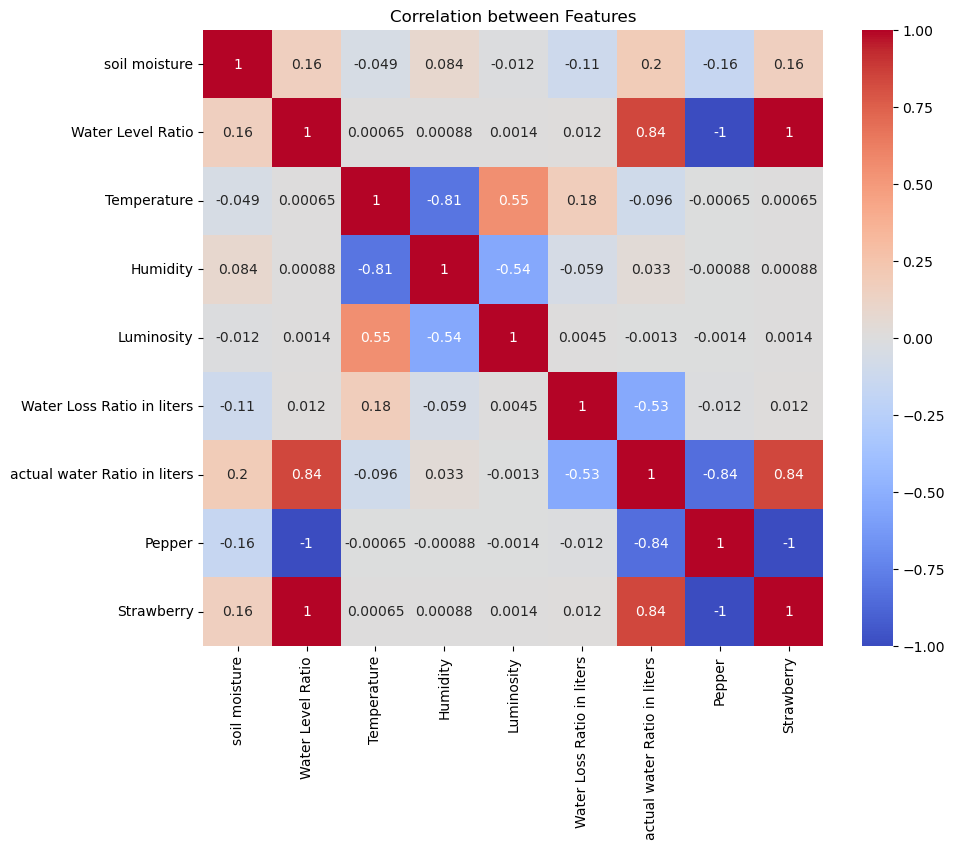

In [27]:
# Calculate the correlation matrix
correlation_matrix = data.corr()

# Plot the correlation between features and target
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation between Features")
plt.show()

In [28]:
data.sample(frac=1)

,soil moisture,Water Level Ratio,Temperature,Humidity,Luminosity,Water Loss Ratio in liters,actual water Ratio in liters,Pepper,Strawberry
4705,17,2.5,25.2,55.3,10770,0.753982,1.746018,1,0
756,67,3.5,15.6,72.6,2068,0.402124,3.097876,0,1
5148,19,2.5,29.5,45.2,3407,0.804248,1.695752,1,0
1119,82,3.5,31.2,47.3,6279,0.301593,3.198407,0,1
3629,277,2.5,18.1,50.8,0,0.100531,2.399469,1,0
...,...,...,...,...,...,...,...,...,...
3373,90,2.5,33.5,37.2,23667,0.201062,2.298938,1,0
5872,276,2.5,27.2,60.4,20103,0.201062,2.298938,1,0
5992,460,2.5,28.1,49.6,0,0.301593,2.198407,1,0
417,341,3.5,16.1,76.8,1,0.402124,3.097876,0,1


In [29]:
X = data.drop('actual water Ratio in liters', axis=1)
y = data['actual water Ratio in liters']

In [30]:
X

,soil moisture,Water Level Ratio,Temperature,Humidity,Luminosity,Water Loss Ratio in liters,Pepper,Strawberry
0,97,3.5,34.0,34.3,0,0.100531,0,1
1,99,3.5,34.0,35.5,5882,0.100531,0,1
2,114,3.5,34.0,35.8,1362,0.000000,0,1
3,123,3.5,33.9,35.1,10658,0.000000,0,1
4,128,3.5,32.8,35.5,10870,0.000000,0,1
...,...,...,...,...,...,...,...,...
6066,554,2.5,31.9,47.4,10707,0.753982,1,0
6067,546,2.5,31.9,39.6,9283,0.753982,1,0
6068,549,2.5,31.8,40.0,9209,0.753982,1,0
6069,552,2.5,32.6,39.4,9223,0.753982,1,0


In [31]:
y

0       3.399469
1       3.399469
2       3.500000
3       3.500000
4       3.500000
          ...   
6066    1.746018
6067    1.746018
6068    1.746018
6069    1.746018
6070    2.198407
Name: actual water Ratio in liters, Length: 6071, dtype: float64

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,shuffle=True)

# Machine Learning

In [33]:
mse_scores = []
rmse_scores=[]
mae_scores=[]
r2_scores=[]
models = []

# LinearRegression

In [34]:
Linear_Regression=LinearRegression()
Linear_Regression.fit(X_train, y_train)

LinearRegression()

In [35]:
predicted_values = Linear_Regression.predict(X_test)
LinearRegressionmae=mean_absolute_error(y_test, predicted_values)
mae_scores.append(LinearRegressionmae)
LinearRegressionmse=mean_squared_error(y_test, predicted_values)
mse_scores.append(LinearRegressionmse)
LinearRegressionrmse = np.sqrt(LinearRegressionmse)
rmse_scores.append(LinearRegressionrmse)
LinearRegressionr2 = r2_score(y_test, predicted_values)
r2_scores.append(LinearRegressionr2)
models.append('Linear Regression')

In [36]:
print("MSE (Mean Square Error):", LinearRegressionmse)
print("MAE (Mean Absolute Error)", LinearRegressionmae)
print("(RMSE) Root Mean Squared Error:", LinearRegressionrmse)
print("R2 Score:", LinearRegressionr2)

MSE (Mean Square Error): 5.154190921859949e-26
MAE (Mean Absolute Error) 1.8492808450546144e-13
(RMSE) Root Mean Squared Error: 2.27028432621554e-13
R2 Score: 1.0


In [37]:
print(y_test[:6])
print(predicted_values[:6])

2764    2.997345
2722    3.047611
3487    2.248673
3700    2.500000
5767    2.097876
4210    1.746018
Name: actual water Ratio in liters, dtype: float64
[2.99734518 3.04761066 2.24867259 2.5        2.09787614 1.74601776]


In [38]:
sample=[[78,3.5,23.7,43.9,6393,0.4,0,1]]
Linear_Regression.predict(sample)

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([3.1])

# Decision Tree

In [49]:
DecisionTree = DecisionTreeRegressor(random_state=42)
DecisionTree.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [50]:
predicted_values = DecisionTree.predict(X_test)
DecisionTreemae=mean_absolute_error(y_test, predicted_values)
mae_scores.append(DecisionTreemae)
DecisionTreemse=mean_squared_error(y_test, predicted_values)
mse_scores.append(DecisionTreemse)
DecisionTreermse = np.sqrt(DecisionTreemse)
rmse_scores.append(DecisionTreermse)
DecisionTreer2 = r2_score(y_test, predicted_values)
r2_scores.append(DecisionTreer2)
models.append('Decision Tree')

In [51]:
print("MSE (Mean Square Error):", DecisionTreemse)
print("MAE (Mean Absolute Error)", DecisionTreemae)
print("(RMSE) Root Mean Squared Error:", DecisionTreermse)
print("R2 Score:", DecisionTreer2)

MSE (Mean Square Error): 3.951091012913466e-05
MAE (Mean Absolute Error) 0.00028959537218992907
(RMSE) Root Mean Squared Error: 0.006285770448332858
R2 Score: 0.999891056231951


In [52]:
print(y_test[:6])
print(predicted_values[:6])

2764    2.997345
2722    3.047611
3487    2.248673
3700    2.500000
5767    2.097876
4210    1.746018
Name: actual water Ratio in liters, dtype: float64
[2.99734518 3.04761066 2.24867259 2.5        2.09787614 1.74601776]


In [53]:
sample=[[78,3.5,23.7,43.9,6393,0.4,0,1]]
DecisionTree.predict(sample)

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  "X does not have valid feature names, but"


array([3.09787614])

In [54]:
# Save Model as Pickel
DT_pkl_filename = 'DecisionTree.pkl'
DT_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(DecisionTree, DT_Model_pkl)
DT_Model_pkl.close()

# Random Forest

In [55]:
RandomForest = RandomForestRegressor(n_estimators=100, random_state=42)
RandomForest.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [56]:
predicted_values = RandomForest.predict(X_test)
RandomForestmae=mean_absolute_error(y_test, predicted_values)
mae_scores.append(RandomForestmae)
RandomForestmse=mean_squared_error(y_test, predicted_values)
mse_scores.append(RandomForestmse)
RandomForestrmse = np.sqrt(RandomForestmse)
rmse_scores.append(RandomForestrmse)
RandomForestr2 = r2_score(y_test, predicted_values)
r2_scores.append(RandomForestr2)
models.append('Random Forest')

In [57]:
print("MSE (Mean Square Error):", RandomForestmse)
print("MAE (Mean Absolute Error)", RandomForestmae)
print("(RMSE) Root Mean Squared Error:", RandomForestrmse)
print("R2 Score:", RandomForestr2)

MSE (Mean Square Error): 1.8587387789854783e-05
MAE (Mean Absolute Error) 0.0002924913259087547
(RMSE) Root Mean Squared Error: 0.004311309289514588
R2 Score: 0.999948748837792


In [58]:
print(y_test[:6])
print(predicted_values[:6])

2764    2.997345
2722    3.047611
3487    2.248673
3700    2.500000
5767    2.097876
4210    1.746018
Name: actual water Ratio in liters, dtype: float64
[2.99734518 3.04761066 2.24867259 2.5        2.09787614 1.74601776]


In [59]:
sample=[[78,3.5,23.7,43.9,6393,0.4,0,1]]
RandomForest.predict(sample)

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"


array([3.09787614])

In [60]:
# Save Model as Pickel
RF_pkl_filename = 'RandomForestPredict.pkl'
RF_Model_pkl = open(RF_pkl_filename, 'wb')
pickle.dump(RandomForest, RF_Model_pkl)
RF_Model_pkl.close()

<AxesSubplot:title={'center':'Mean Square Error Comparison'}, xlabel='MSE', ylabel='Algorithm'>

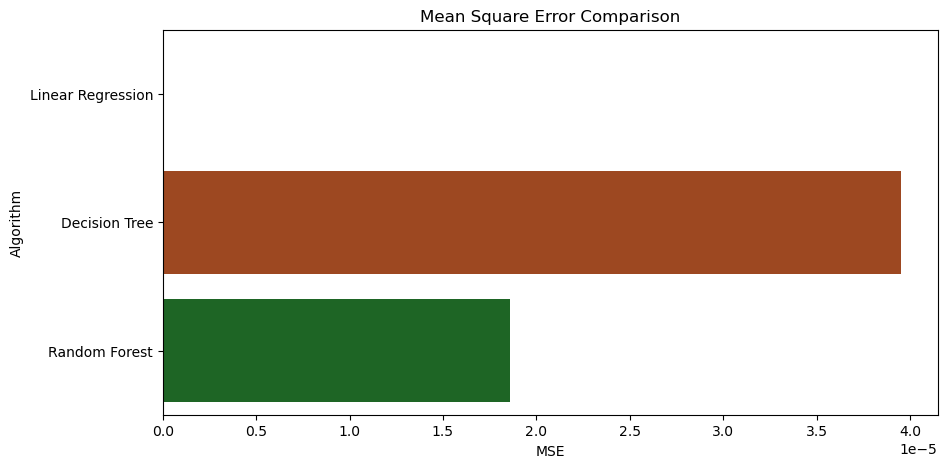

In [61]:
plt.figure(figsize=[10,5])
plt.title('Mean Square Error Comparison')
plt.xlabel('MSE')
plt.ylabel('Algorithm')
sns.barplot(x = mse_scores,y = models,palette='dark')

In [62]:
# Check Model's Accuracy
accuracy_models = dict(zip(models, mse_scores))
for k, v in accuracy_models.items():
    print(k, ' : ', v)

Linear Regression  :  5.154190921859949e-26
Decision Tree  :  3.951091012913466e-05
Random Forest  :  1.8587387789854783e-05


<AxesSubplot:title={'center':'Mean Absolute Error Comparison'}, xlabel='MAE', ylabel='Algorithm'>

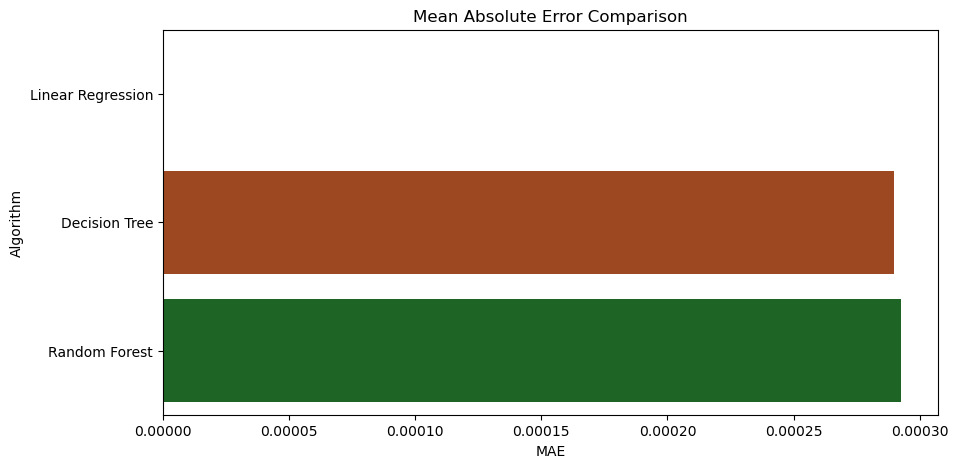

In [63]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Mean Absolute Error Comparison')
plt.xlabel('MAE')
plt.ylabel('Algorithm')
sns.barplot(x = mae_scores,y = models,palette='dark')

In [64]:
# Check Model's MAE
accuracy_models = dict(zip(models, mae_scores))
for k, v in accuracy_models.items():
    print(k, ' : ', v)

Linear Regression  :  1.8492808450546144e-13
Decision Tree  :  0.00028959537218992907
Random Forest  :  0.0002924913259087547


<AxesSubplot:title={'center':'root mean squared error (RMSE) Comparison'}, xlabel='root mean squared error (RMSE)', ylabel='Algorithm'>

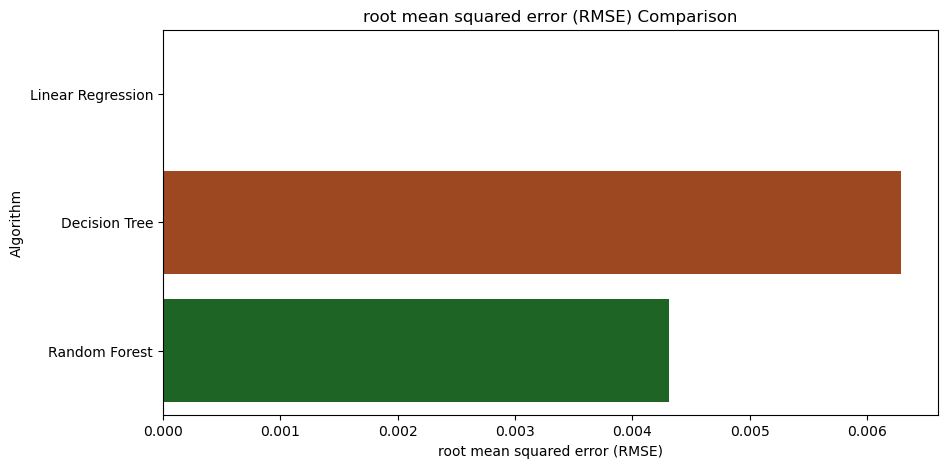

In [65]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('root mean squared error (RMSE) Comparison')
plt.xlabel('root mean squared error (RMSE)')
plt.ylabel('Algorithm')
sns.barplot(x = rmse_scores,y = models,palette='dark')

In [66]:
# Check Model's Accuracy
accuracy_models = dict(zip(models, rmse_scores))
for k, v in accuracy_models.items():
    print(k, ' : ', v)

Linear Regression  :  2.27028432621554e-13
Decision Tree  :  0.006285770448332858
Random Forest  :  0.004311309289514588


<AxesSubplot:title={'center':'R2 Scores'}, xlabel='r2)', ylabel='Algorithm'>

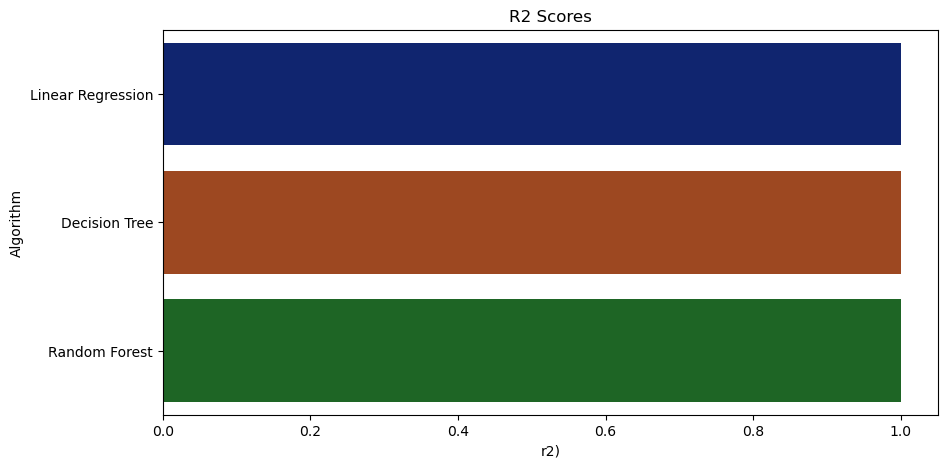

In [67]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('R2 Scores')
plt.xlabel('r2)')
plt.ylabel('Algorithm')
sns.barplot(x = r2_scores,y = models,palette='dark')

In [68]:
# Check Model's Accuracy
accuracy_models = dict(zip(models, r2_scores))
for k, v in accuracy_models.items():
    print(k, ' : ', v)

Linear Regression  :  1.0
Decision Tree  :  0.999891056231951
Random Forest  :  0.999948748837792
